## Challenge for unit 2, lesson 2.4: "What Do You See?"

The dataset can be found at the following address: https://www.kaggle.com/mirichoi0218/insurance

In [158]:
# Imports and set-up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# Load data set and output basic descriptive info
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [161]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


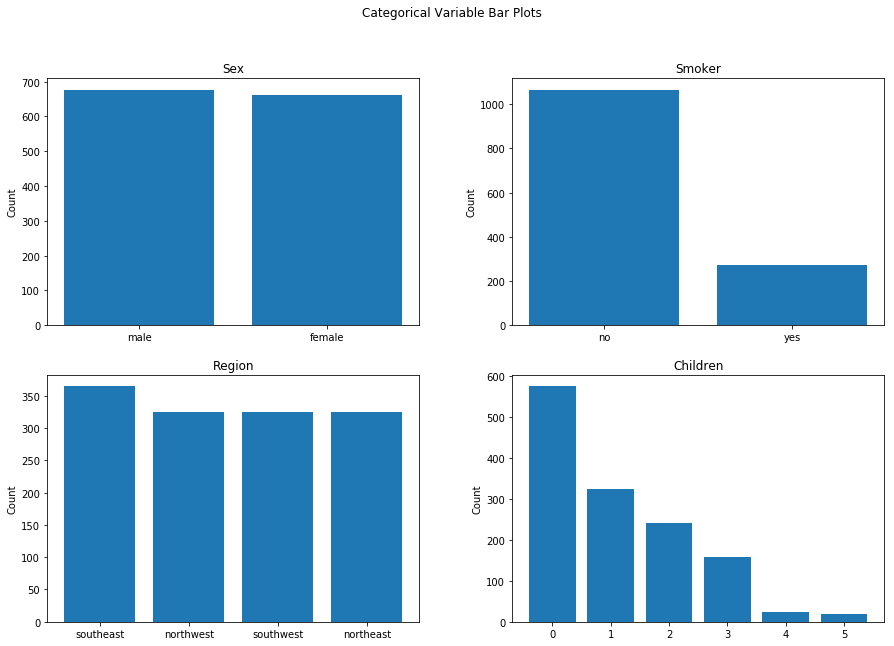

In [285]:
# Categorical Variable Bar Plots

plt.figure(1, figsize=(15, 10))
plt.subplot(221)
plt.bar(df["sex"].value_counts().index, df["sex"].value_counts())
plt.ylabel("Count")
plt.title("Sex")

plt.subplot(222)
plt.bar(df["smoker"].value_counts().index, df["smoker"].value_counts())
plt.ylabel("Count")
plt.title("Smoker")

plt.subplot(223)
plt.bar(df["region"].value_counts().index, df["region"].value_counts())
plt.ylabel("Count")
plt.title("Region")

plt.subplot(224)
plt.bar(df["children"].value_counts().index, df["children"].value_counts())
plt.ylabel("Count")
plt.title("Children")

plt.suptitle("Categorical Variable Bar Plots")
plt.subplots_adjust(wspace=0.25)
plt.show()

The categorical variable bar plots above help with understanding the data set. From them, I can tell that each observation is roughly equally split by sex and region while being predominantly composed of non-smokers and families with two or fewer children.

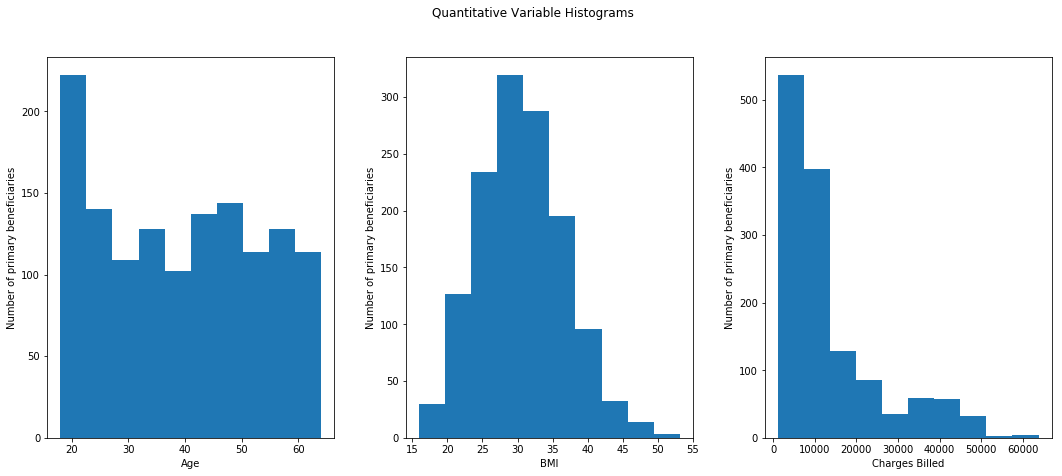

In [114]:
# Quantitative Variable Histograms

plt.figure(1, figsize=(18, 7))

plt.subplot(131)
plt.hist(df["age"])
plt.ylabel("Number of primary beneficiaries")
plt.xlabel("Age")

plt.subplot(132)
plt.hist(df["bmi"])
plt.ylabel("Number of primary beneficiaries")
plt.xlabel("BMI")

plt.subplot(133)
plt.hist(df["charges"])
plt.ylabel("Number of primary beneficiaries")
plt.xlabel("Charges Billed")

plt.suptitle("Quantitative Variable Histograms")
plt.subplots_adjust(wspace=0.25)

plt.show()

The histograms above are for the three quantitive variables in the dataset. Age has a roughly uniform distribution. BMI seems to be normally distributed with a slight right skew. Charges billed have a heavy right skew.

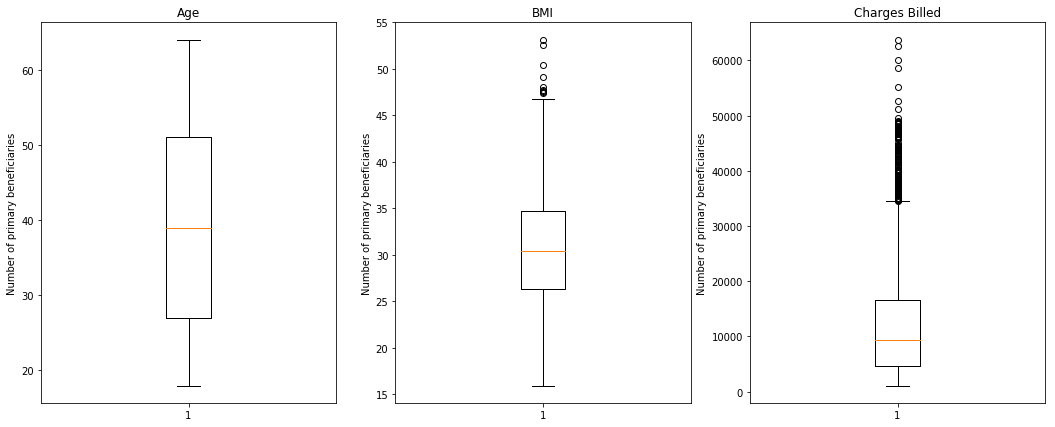

In [274]:
plt.figure(1, figsize=(18, 7))

plt.subplot(131)
plt.boxplot(df["age"])
plt.title("Age")
plt.ylabel("Number of primary beneficiaries")


plt.subplot(132)
plt.boxplot(df["bmi"])
plt.title("BMI")
plt.ylabel("Number of primary beneficiaries")

plt.subplot(133)
plt.boxplot(df["charges"])
plt.title("Charges Billed")
plt.ylabel("Number of primary beneficiaries")


plt.show()

The box-plots above are also for dataset's three quantitive variables. They don't add any more information above and beyond the histograms except to make the outliers pop out more for both BMI and charges billed (especially).

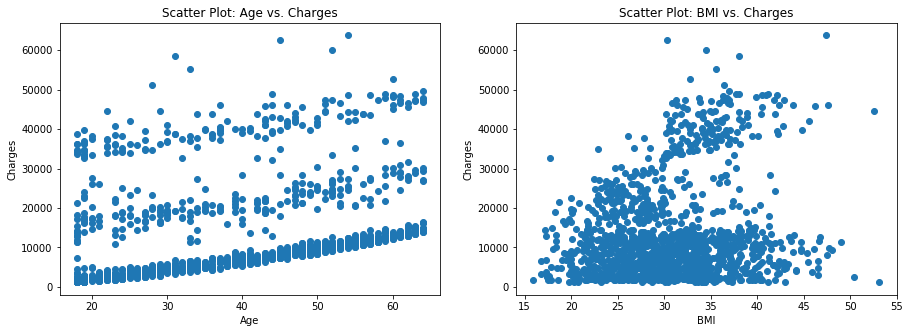

In [278]:
plt.figure(1, figsize=(15, 5))

plt.subplot(121)
plt.scatter(df["age"], df["charges"])
plt.title("Scatter Plot: Age vs. Charges")
plt.ylabel("Charges")
plt.xlabel("Age")

plt.subplot(122)
plt.scatter(df["bmi"], df["charges"])
plt.title("Scatter Plot: BMI vs. Charges")
plt.ylabel("Charges")
plt.xlabel("BMI")

plt.show()

The two scatter plots show a positive association between age and charges, and BMI and charges. The first shows three parallel bands that I'm not at all certain how to interpret. The second looks more like a run-of-the-mill positive association but with an interesting clumping at roughly $10,000 in charges and below.

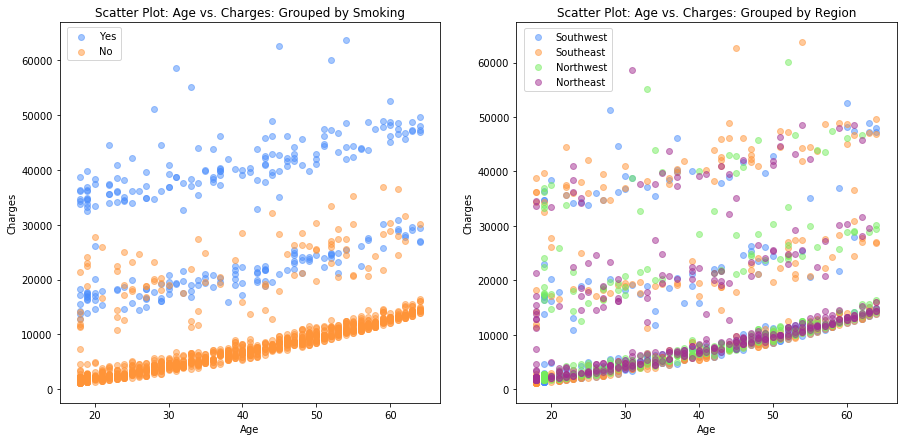

In [282]:
colors = ["#4b8efc", "#ff9438", "#74ed5e", "#a32f91"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for i in range(len(df["smoker"].unique())):
    axes[0].scatter(df[df["smoker"] == df["smoker"].unique()[i]]["age"], df[df["smoker"] == df["smoker"].unique()[i]]["charges"],
                   color=colors[i], alpha=0.5, label=df["smoker"].unique()[i].capitalize())

axes[0].set_title("Scatter Plot: Age vs. Charges: Grouped by Smoking")
axes[0].set_ylabel("Charges")
axes[0].set_xlabel("Age")
axes[0].legend(loc=(0.02, 0.9))


for i in range(len(df["region"].unique())):
    axes[1].scatter(df[df["region"] == df["region"].unique()[i]]["age"],
                    df[df["region"] == df["region"].unique()[i]]["charges"],
                    color=colors[i], alpha=0.5, label=df["region"].unique()[i].capitalize())

axes[1].set_title("Scatter Plot: Age vs. Charges: Grouped by Region")
axes[1].set_ylabel("Charges")
axes[1].set_xlabel("Age")

axes[1].legend(loc=(0.02, 0.82))

plt.show()

These graphs show the same scatter plot for Age vs. Charges, but are also grouped by the categorical variables smoking and region. The region grouping doesn't seem to display any exciting patterns, but the smoking groups are curiously concentrated in that lower (roughly $10,000 and below) band.

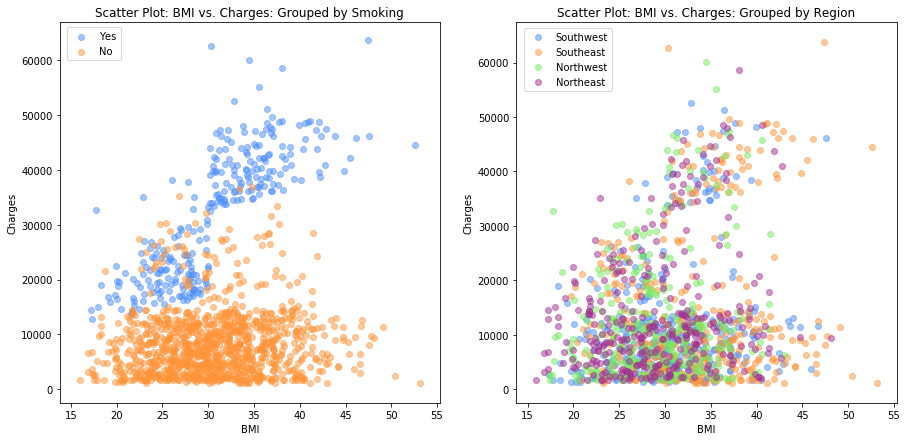

In [284]:
colors = ["#4b8efc", "#ff9438", "#74ed5e", "#a32f91"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for i in range(len(df["smoker"].unique())):
    axes[0].scatter(df[df["smoker"] == df["smoker"].unique()[i]]["bmi"], df[df["smoker"] == df["smoker"].unique()[i]]["charges"],
                   color=colors[i], alpha=0.5, label=df["smoker"].unique()[i].capitalize())

axes[0].set_title("Scatter Plot: BMI vs. Charges: Grouped by Smoking")
axes[0].set_ylabel("Charges")
axes[0].set_xlabel("BMI")
axes[0].legend(loc=(0.02, 0.9))

for i in range(len(df["region"].unique())):
    axes[1].scatter(df[df["region"] == df["region"].unique()[i]]["bmi"],
                    df[df["region"] == df["region"].unique()[i]]["charges"],
                    color=colors[i], alpha=0.5, label=df["region"].unique()[i].capitalize())

axes[1].set_title("Scatter Plot: BMI vs. Charges: Grouped by Region")
axes[1].set_ylabel("Charges")
axes[1].set_xlabel("BMI")
axes[1].legend(loc=(0.02, 0.82))

plt.show()

Again, these graphs show the same scatter plots but for BMI vs. Charges further grouped by smoking and region. As before,  region grouping looks random. The smoking groups again show that concentration at a line roughly $10,000 and below.